### SCDM project meeting 07/30/20 
### by Peace Kotamnives 

### Water64 sample

#### We are investigating the 2774 virtual orbitals and try to test different SCDM localizations of the 2500 virtual orbitals 
#### Later, we will also look at the diffrences between orthogonalized and non-orthogonalized SCDM orbitals 
#### Lastly, the projectability is intruduced for future work in virtual subspaces

<IPython.core.display.Javascript object>


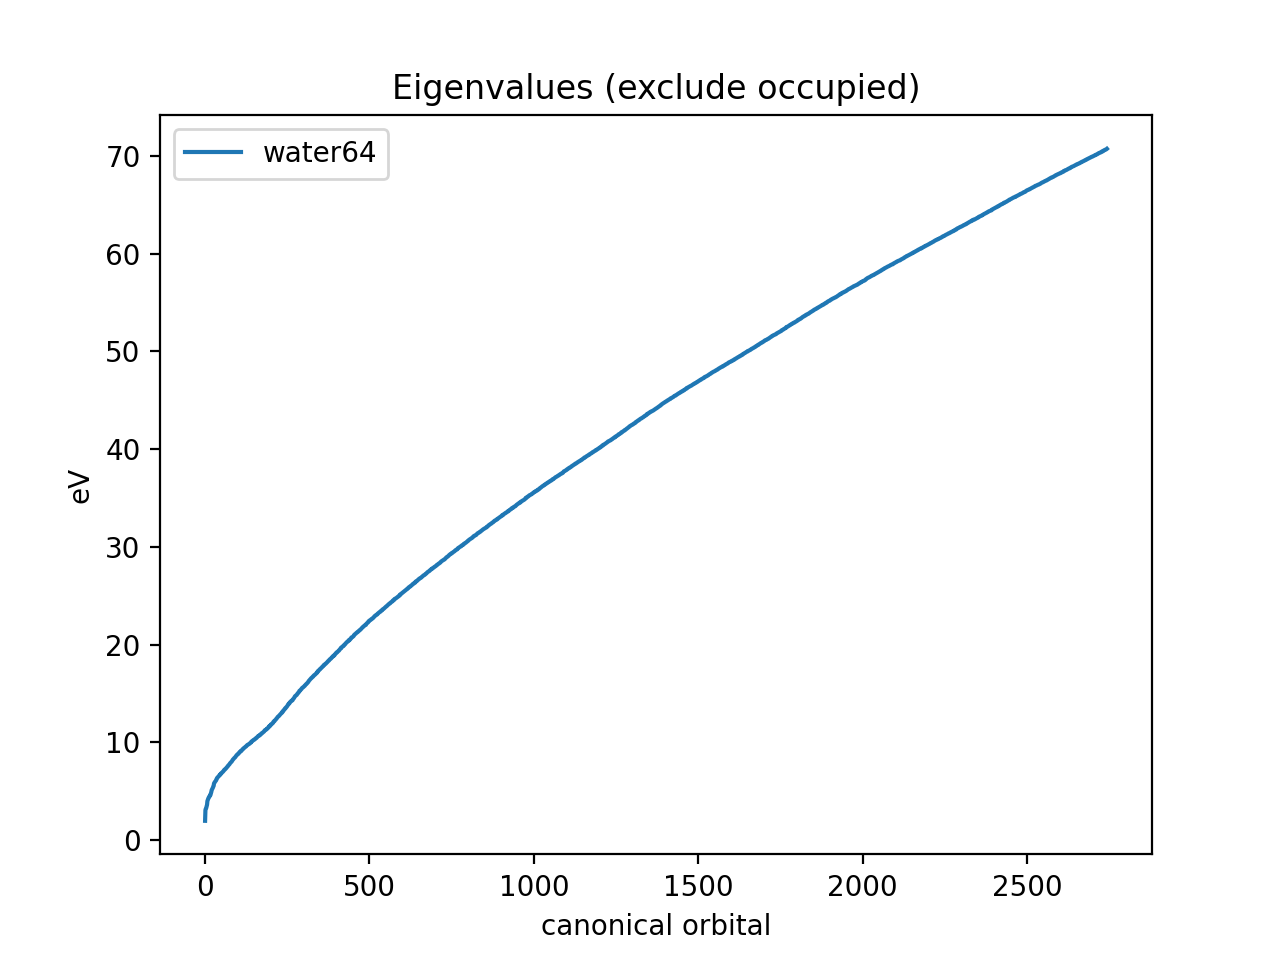

Text(0, 0.5, 'eV')

In [1]:
import numpy as np
from scipy import linalg 
import glob, os
import matplotlib.pyplot as plt
%matplotlib notebook
import mpld3
from scipy.special import erfc
from scipy.optimize import curve_fit

mpld3.enable_notebook()


eig_water64 =  open('water64.eig','r')

lines = eig_water64.readlines()
D_water64 = []
for line in lines:
    orbt_info = np.asarray(line.split()[0:3],dtype='float')
    D_water64.append(orbt_info[-1])
eig_water64.close()

plt.figure(1)
plt.rcParams["figure.figsize"] = [7,4]
plt.plot(D_water64[256:],label='water64')
plt.legend()
plt.title('Eigenvalues (exclude occupied)')
plt.xlabel('canonical orbital')
plt.ylabel('eV')

<IPython.core.display.Javascript object>


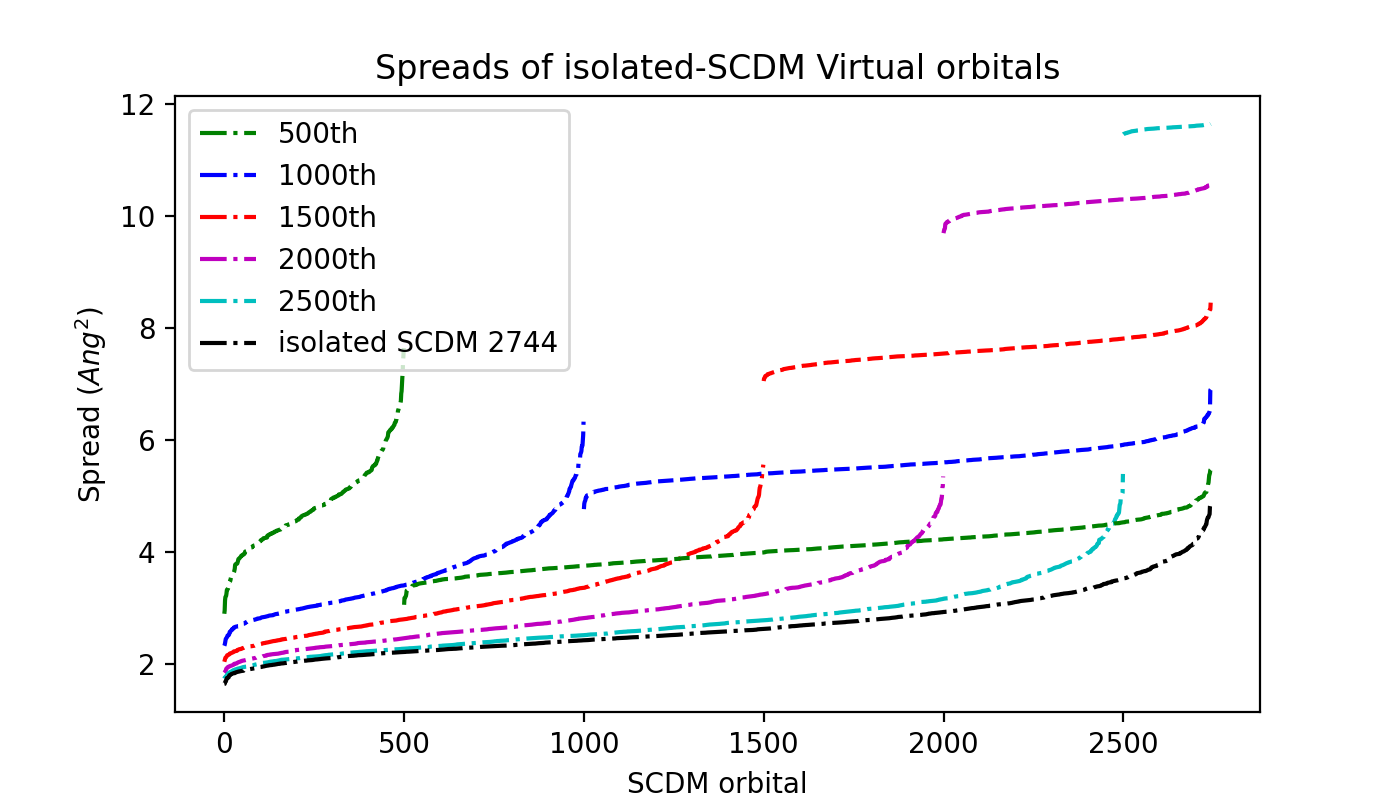

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [2]:
Omegas64_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_2744_virt_water64.npy')
Omegas756_1_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_756_isolated_dim1.npy')
Omegas1756_1_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_1756_isolated_dim1.npy')
Omegas1256_1_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_1256_isolated_dim1.npy')
Omegas2256_1_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_2256_isolated_dim1.npy')
Omegas2756_1_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_2756_isolated_dim1.npy')

Omegas756_2_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_756_isolated_dim2.npy')
Omegas1756_2_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_1756_isolated_dim2.npy')
Omegas1256_2_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_1256_isolated_dim2.npy')
Omegas2256_2_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_2256_isolated_dim2.npy')
Omegas2756_2_phivirt = np.load('unsorted_obtl_spread_scdm_phi_dim_2756_isolated_dim2.npy')

plt.figure(2)
plt.plot(range(500),sorted(Omegas756_1_phivirt),'g-.',label='500th')
plt.plot(range(1000),sorted(Omegas1256_1_phivirt),'b-.',label='1000th')
plt.plot(range(1500),sorted(Omegas1756_1_phivirt),'r-.',label='1500th')
plt.plot(range(2000),sorted(Omegas2256_1_phivirt),'m-.',label='2000th')
plt.plot(range(2500),sorted(Omegas2756_1_phivirt),'c-.',label='2500th')
plt.plot(range(2744),sorted(Omegas64_phivirt),'k-.',label='isolated SCDM 2744')
plt.legend()
plt.plot(range(500,2744),sorted(Omegas756_2_phivirt),'g--',label='500th')
plt.plot(range(1000,2744),sorted(Omegas1256_2_phivirt),'b--',label='1000th')
plt.plot(range(1500,2744),sorted(Omegas1756_2_phivirt),'r--',label='1500th')
plt.plot(range(2000,2744),sorted(Omegas2256_2_phivirt),'m--',label='2000th')
plt.plot(range(2500,2744),sorted(Omegas2756_2_phivirt),'c--',label='2500th')

plt.rcParams["figure.figsize"] = [7,4]
plt.title('Spreads of isolated-SCDM Virtual orbitals')
plt.xlabel('SCDM orbital')
plt.ylabel('Spread ($Ang^{2}$)')

<IPython.core.display.Javascript object>


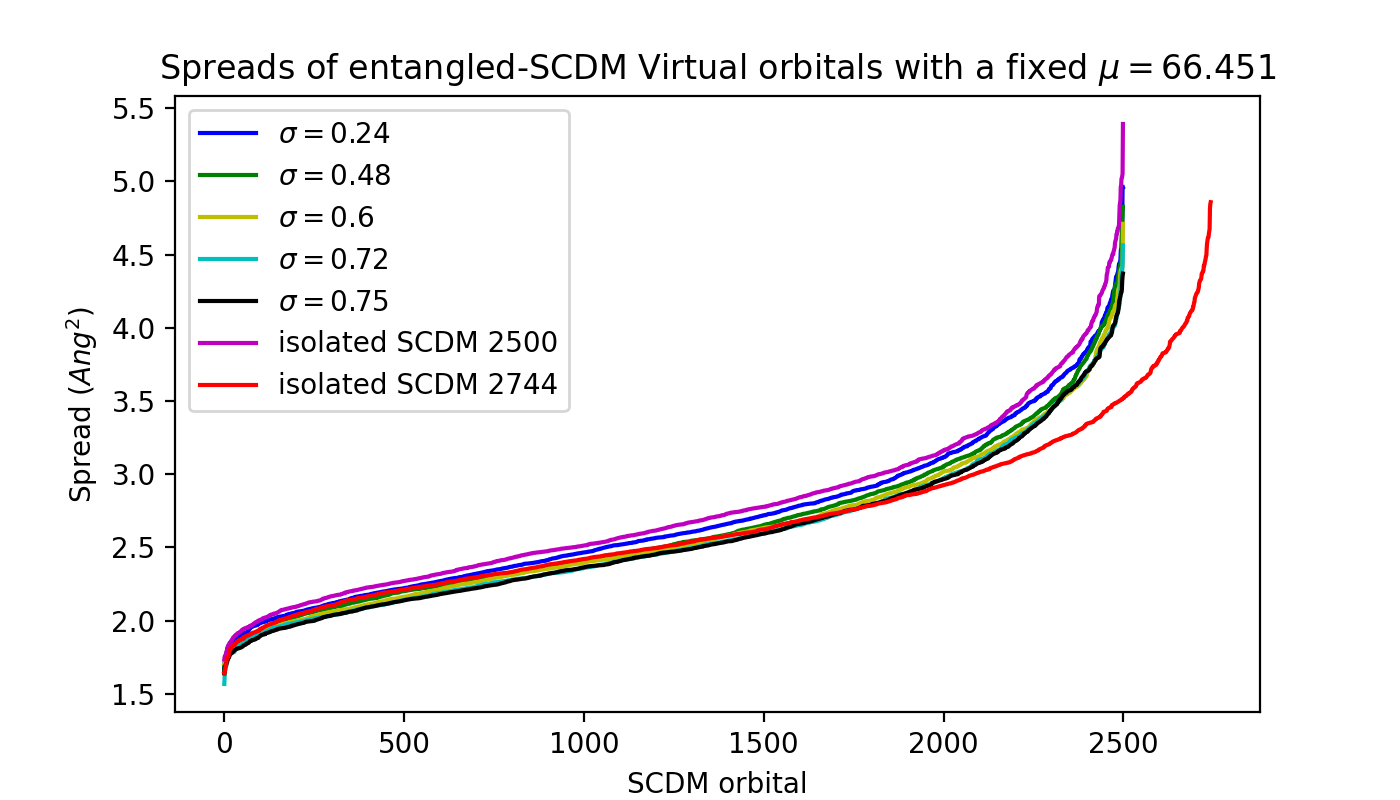

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [3]:
Omegas2500_t1 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.12.npy')
Omegas2500_t2 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.24.npy')
Omegas2500_t3 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.48.npy')
Omegas2500_t4 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.6.npy')
Omegas2500_t5 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.72.npy')
Omegas2500_t6 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.75.npy')
Omegas2500_t7 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.78.npy')
s_Omega64_virt = sorted(Omegas64_phivirt)

plt.figure(3)
plt.plot(range(2500),sorted(Omegas2500_t2),'b-',label='$\sigma = 0.24$')
plt.plot(range(2500),sorted(Omegas2500_t3),'g-',label='$\sigma = 0.48$')
plt.plot(range(2500),sorted(Omegas2500_t4),'y-',label='$\sigma = 0.6$')
plt.plot(range(2500),sorted(Omegas2500_t5),'c-',label='$\sigma = 0.72$')
plt.plot(range(2500),sorted(Omegas2500_t6),'k-',label='$\sigma = 0.75$')
plt.plot(range(2500),sorted(Omegas2756_1_phivirt),'m-',label='isolated SCDM 2500')
plt.plot(range(2744),s_Omega64_virt, 'r-',label='isolated SCDM 2744')
plt.legend()

plt.rcParams["figure.figsize"] = [7,4]
plt.title('Spreads of entangled-SCDM Virtual orbitals with a fixed $\mu = 66.451$')
plt.xlabel('SCDM orbital')
plt.ylabel('Spread ($Ang^{2}$)')

<IPython.core.display.Javascript object>


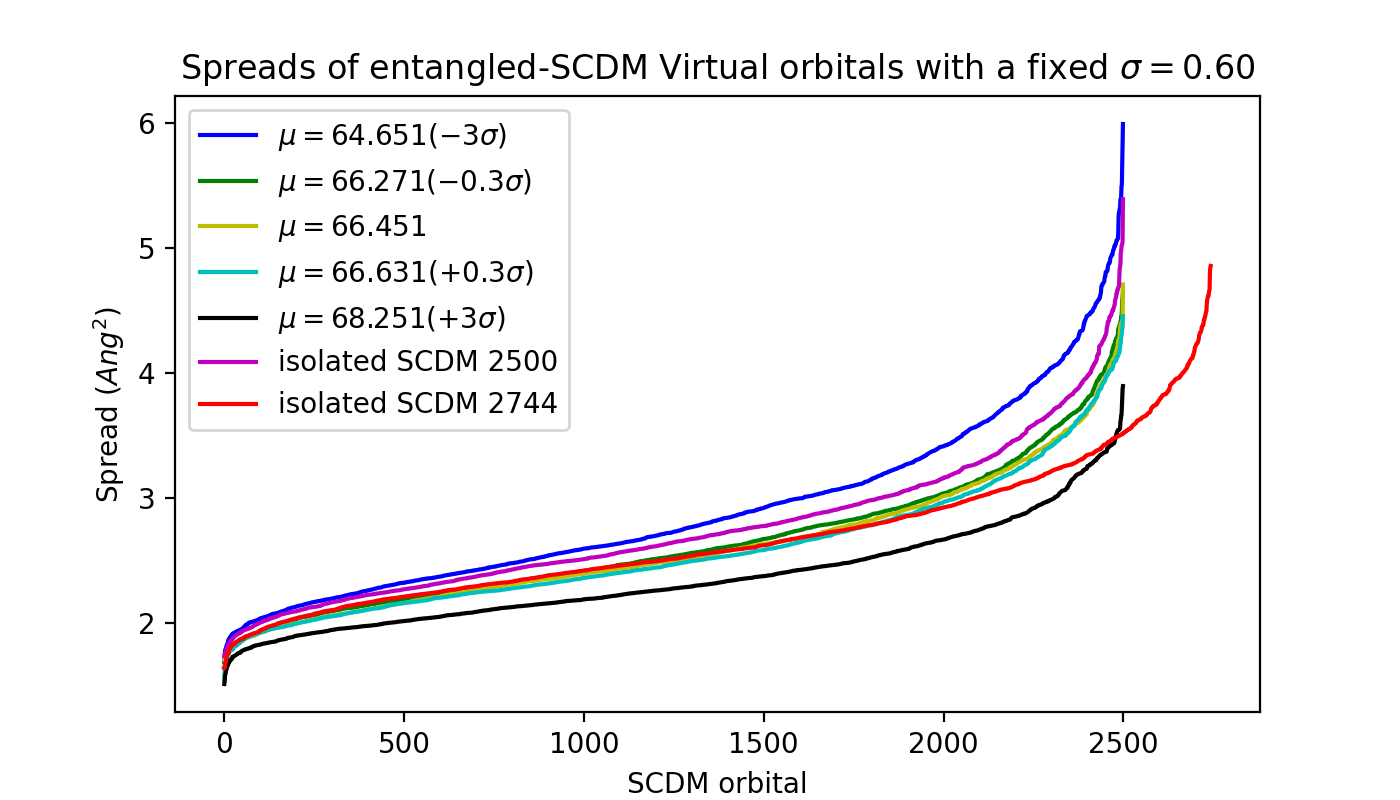

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [4]:
Omegas2500_t4_m10del = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_64.651_sigma_0.6.npy')
Omegas2500_t4_mdel = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.271_sigma_0.6.npy')
Omegas2500_t4 = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.451_sigma_0.6.npy')
Omegas2500_t4_pdel = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_66.631_sigma_0.6.npy')
Omegas2500_t4_p10del = np.load('unsorted_obtl_spread_scdm_phi_dim_2500_mu_68.251_sigma_0.6.npy')

s_Omega64_virt = sorted(Omegas64_phivirt)

plt.figure(4)
plt.plot(range(2500),sorted(Omegas2500_t4_m10del),'b-',label='$\mu = 64.651(\minus 3\sigma)$')
plt.plot(range(2500),sorted(Omegas2500_t4_mdel),'g-',label='$\mu = 66.271(\minus 0.3\sigma)$')
plt.plot(range(2500),sorted(Omegas2500_t4),'y-',label='$\mu = 66.451$')
plt.plot(range(2500),sorted(Omegas2500_t4_pdel),'c-',label='$\mu = 66.631(\plus 0.3\sigma)$')
plt.plot(range(2500),sorted(Omegas2500_t4_p10del),'k-',label='$\mu = 68.251(\plus 3\sigma)$')
plt.plot(range(2500),sorted(Omegas2756_1_phivirt),'m-',label='isolated SCDM 2500')
plt.plot(range(2744),s_Omega64_virt, 'r-',label='isolated SCDM 2744')
plt.legend()

plt.rcParams["figure.figsize"] = [7,4]
plt.title('Spreads of entangled-SCDM Virtual orbitals with a fixed $\sigma = 0.60$')
plt.xlabel('SCDM orbital')
plt.ylabel('Spread ($Ang^{2}$)')


<IPython.core.display.Javascript object>


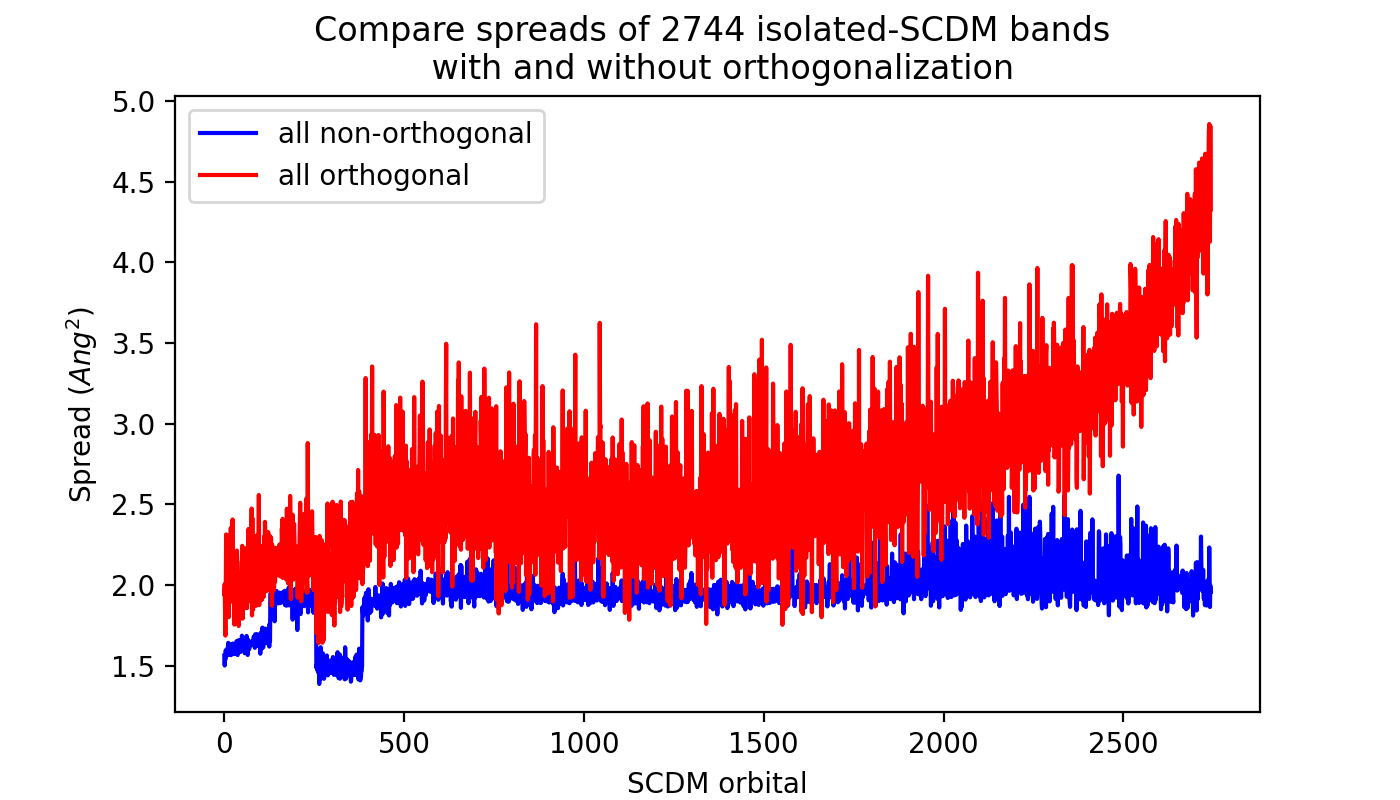

<IPython.core.display.Javascript object>


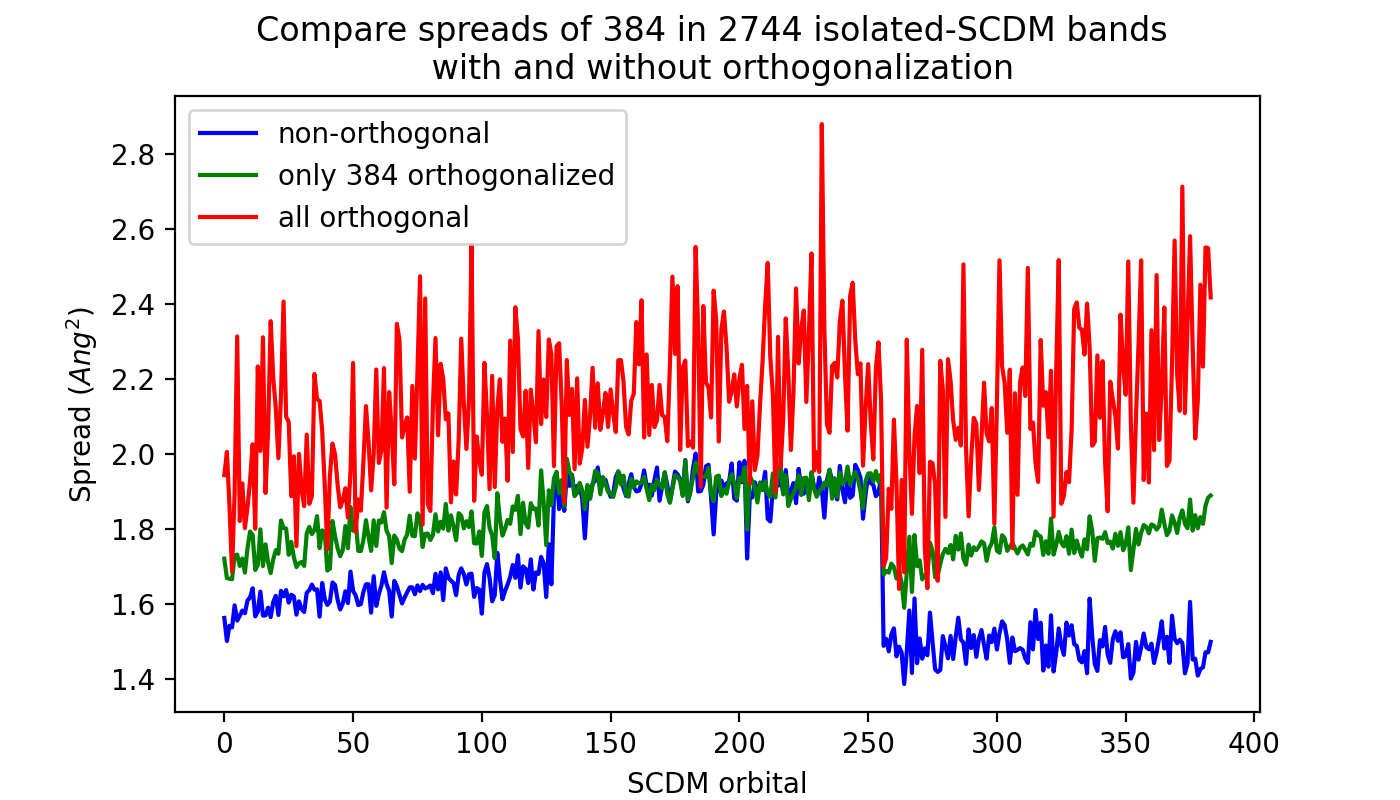

<IPython.core.display.Javascript object>


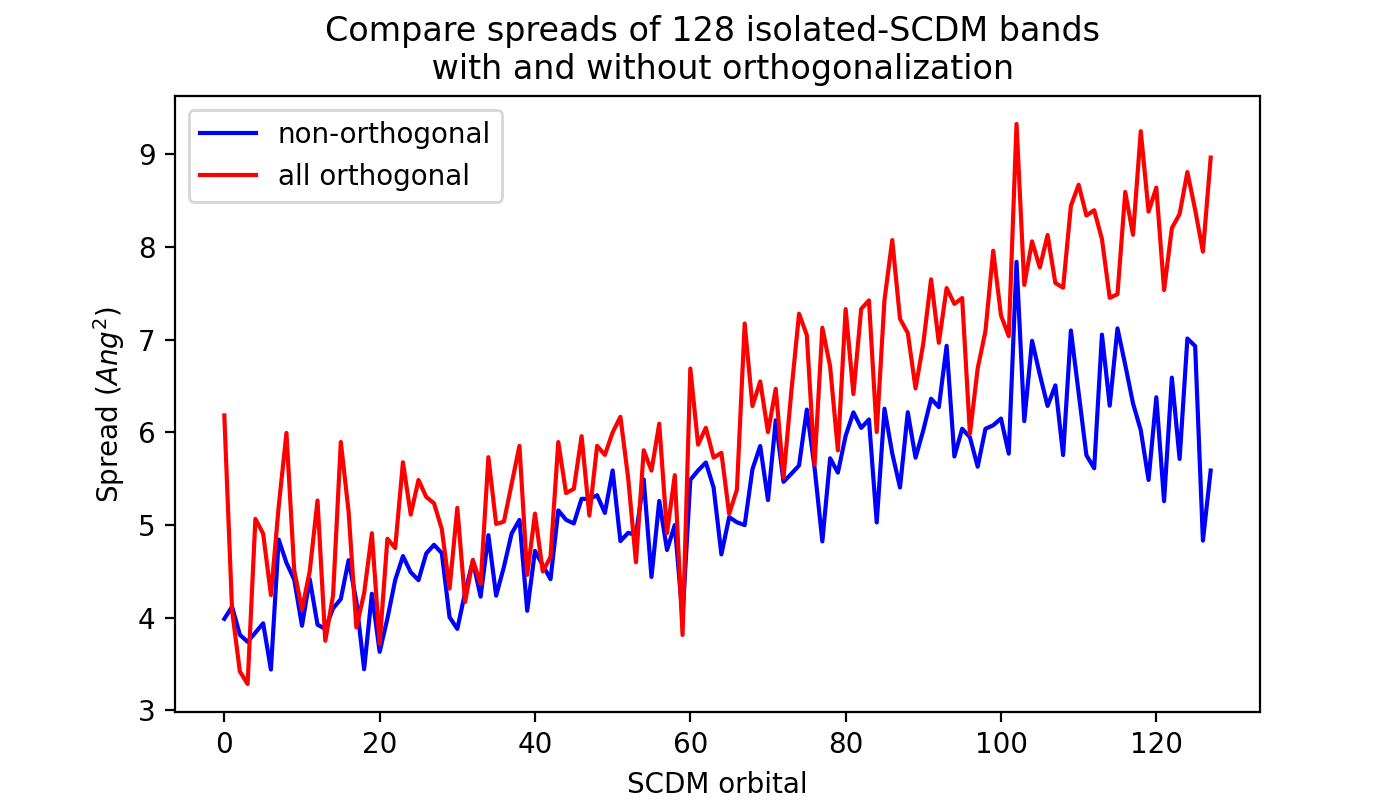

<IPython.core.display.Javascript object>


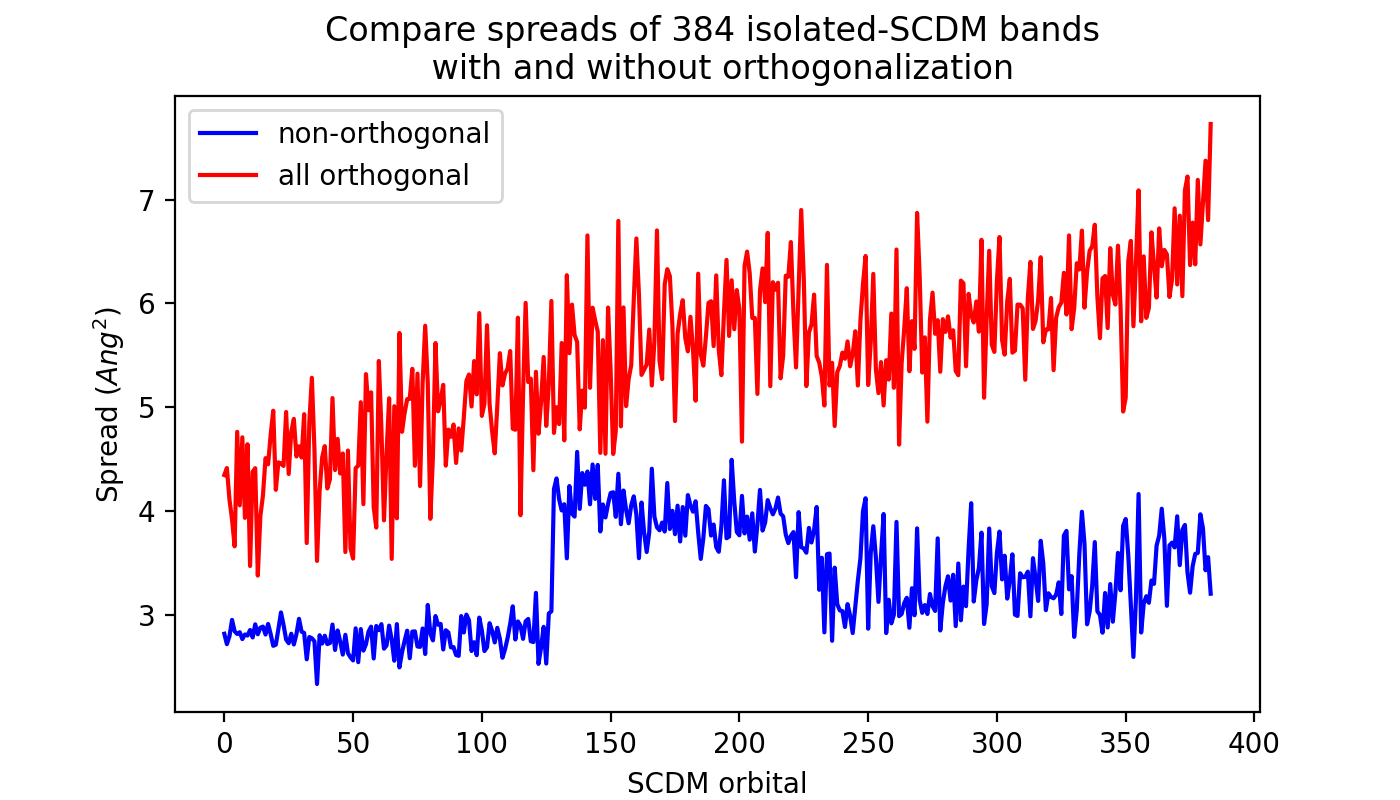

Text(0, 0.5, 'Spread ($Ang^{2}$)')

In [5]:
Omegas2500_non_t2 = np.load('unsorted_obtl_spread_scdm_non_orth_phi_dim_2500_mu_66.451_sigma_0.24.npy')
Omegas2500_non_t3 = np.load('unsorted_obtl_spread_scdm_non_orth_phi_dim_2500_mu_66.451_sigma_0.48.npy')
Omegas2500_non_t4 = np.load('unsorted_obtl_spread_scdm_non_orth_phi_dim_2500_mu_66.451_sigma_0.6.npy')
Omegas64_non_isolated = np.load('unsorted_obtl_spread_scdm_non_orth_phi_dim_2744_virt_water64.npy')
Omegas64_mix_isolated = np.load('unsorted_obtl_spread_scdm_mix_orth_phi_dim_2744_virt_water64_orth384.npy')

Omega128_non = np.load('unsorted_obtl_spread_scdm_non_orth_phi_dim_128_virt_water64.npy')
Omega128 = np.load('unsorted_obtl_spread_scdm_phi_dim_128_virt_water64.npy')
Omega384_non = np.load('unsorted_obtl_spread_scdm_non_orth_phi_dim_384_virt_water64.npy')
Omega384 = np.load('unsorted_obtl_spread_scdm_phi_dim_384_virt_water64.npy')


plt.figure(5)
plt.plot(range(2744),Omegas64_non_isolated,'b-',label='all non-orthogonal')
plt.plot(range(2744),Omegas64_phivirt,'r-',label='all orthogonal')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Compare spreads of 2744 isolated-SCDM bands \n with and without orthogonalization') 
plt.xlabel('SCDM orbital')
plt.ylabel('Spread ($Ang^{2}$)')

plt.figure(6)
plt.plot(range(384),Omegas64_non_isolated[:384],'b-',label='non-orthogonal')
plt.plot(range(384),Omegas64_mix_isolated[:384],'g-',label='only 384 orthogonalized')
plt.plot(range(384),Omegas64_phivirt[:384],'r-',label='all orthogonal')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Compare spreads of 384 in 2744 isolated-SCDM bands \n with and without orthogonalization') 
plt.xlabel('SCDM orbital')
plt.ylabel('Spread ($Ang^{2}$)')

plt.figure(7)
plt.plot(range(128),Omega128_non,'b-',label='non-orthogonal')
plt.plot(range(128),Omega128,'r-',label='all orthogonal')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Compare spreads of 128 isolated-SCDM bands \n with and without orthogonalization') 
plt.xlabel('SCDM orbital')
plt.ylabel('Spread ($Ang^{2}$)')

plt.figure(8)
plt.plot(range(384),Omega384_non,'b-',label='non-orthogonal')
plt.plot(range(384),Omega384,'r-',label='all orthogonal')
plt.legend()
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Compare spreads of 384 isolated-SCDM bands \n with and without orthogonalization') 
plt.xlabel('SCDM orbital')
plt.ylabel('Spread ($Ang^{2}$)')

#### For future work, we will look at how to apply the idea of projectability according to [1] to find sets of entangled-SCDM parameters that maximally localize virtual orbitals to project on the newly-developed MLBS basis set. 

#### The current idea from the paper is to find a set of projectabilities from the cannonical basis set to the pseudo-atomic orbitals (PAOs) that implies the contribution from some of conduction states leading to the automated entangled-SCDM parameter sets

###### 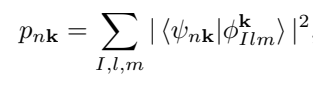
###### Reference: [1] V. Vitale, G. Pizzi, A. Marrazzo, J. Yates, N. Marzari, and A. Mostofi, “Automated highthroughput wannierisation,” (2019), arXiv:1909.00433 .

There are 384 PAOs in total and the eigenvalue at 384th = 9.671805731935


<IPython.core.display.Javascript object>


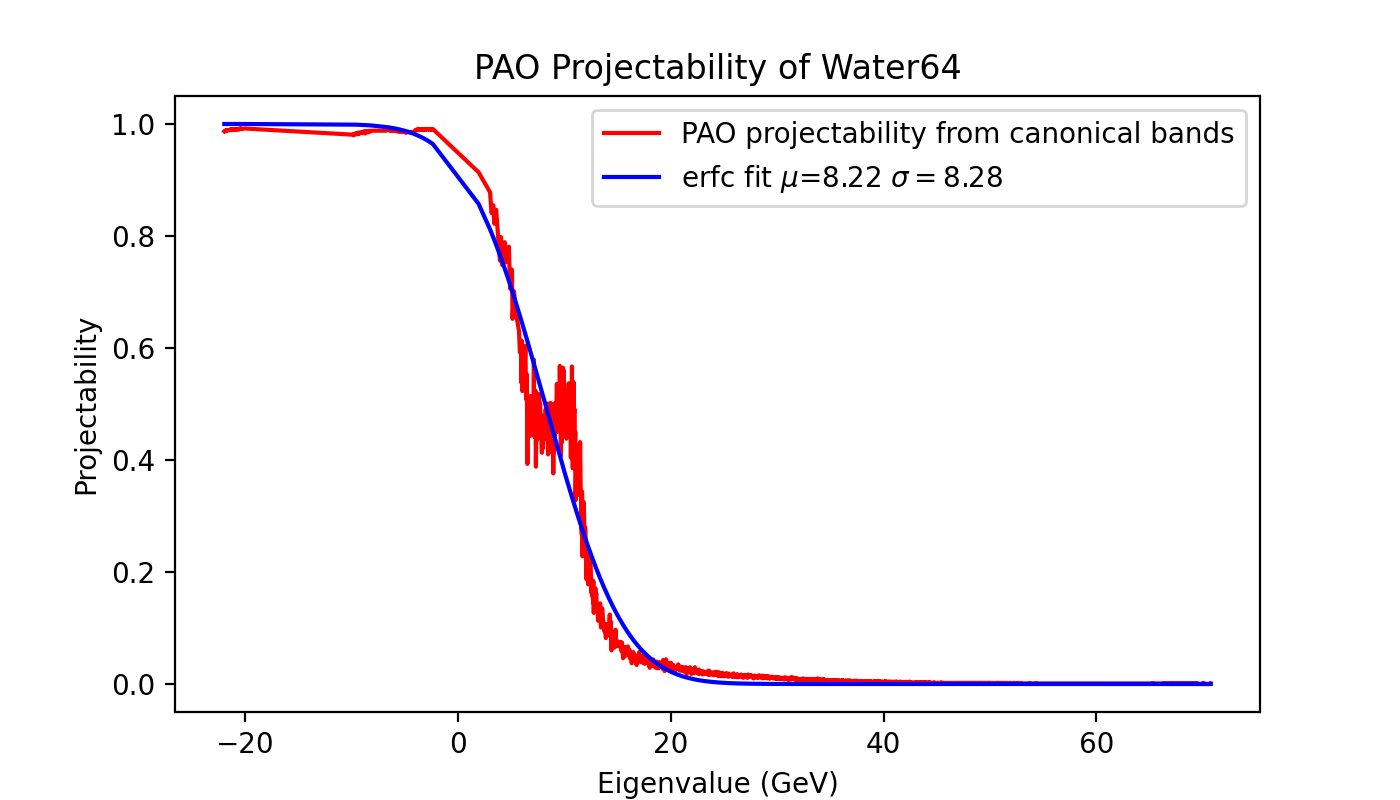

<IPython.core.display.Javascript object>


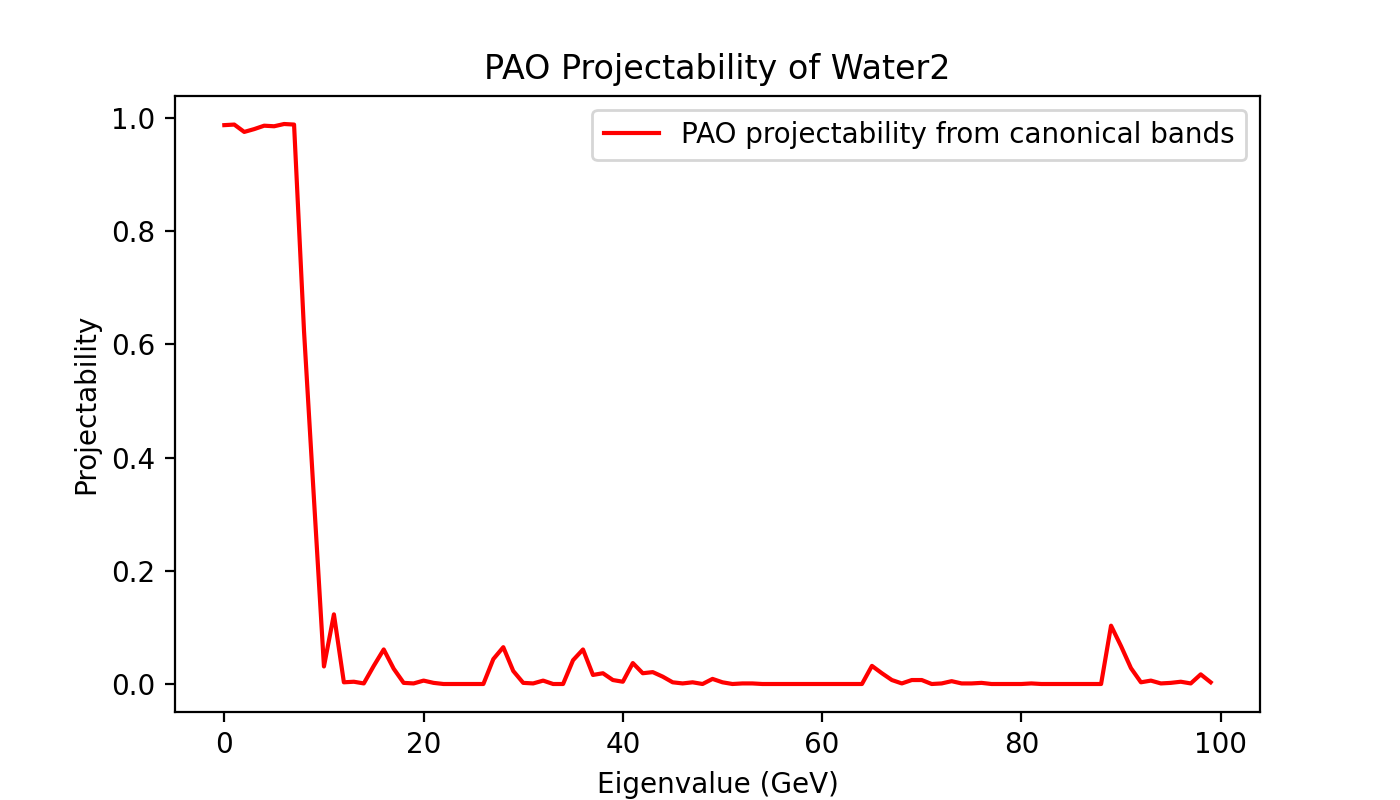

Text(0, 0.5, 'Projectability')

In [6]:
proj_cano_dim3000 = np.load('water64_canonical_dim3000_proj.npy')


guessErf = [ D_water64[383] , 0.6 ]
solErf , pcov = curve_fit( lambda x, mu, sigma : 0.5*erfc( ( x- mu ) / sigma )   , D_water64, proj_cano_dim3000, p0=guessErf )
print('There are 384 PAOs in total and the eigenvalue at 384th = '+str(D_water64[383]))

erfList = [ 0.5*erfc( ( x - solErf[0] ) / solErf[1] ) for x in D_water64 ]


plt.figure(9)
plt.plot(D_water64,proj_cano_dim3000, 'r-', label='PAO projectability from canonical bands')
plt.plot(D_water64,erfList, 'b-', label='erfc fit $\mu$='+str(round(solErf[0],2))+' $\sigma=$'+str(round(solErf[1],2)))
plt.legend()

plt.rcParams["figure.figsize"] = [7,4]
plt.title('PAO Projectability of Water64')
plt.xlabel('Eigenvalue (GeV)')
plt.ylabel('Projectability')

proj_water2_cano2pao = np.load('proj_water2_cano2pao_nband100.npy')
proj_water2_SCDM2pao = np.load('proj_water2_SCDM2pao_nband100.npy')

plt.figure(10)
plt.plot(range(100),proj_water2_cano2pao, 'r-', label='PAO projectability from canonical bands')
plt.legend()

plt.rcParams["figure.figsize"] = [7,4]
plt.title('PAO Projectability of Water2')
plt.xlabel('Eigenvalue (GeV)')
plt.ylabel('Projectability')

In [7]:
len([d for d in D_water64 if d < 20]) - 256


425